**White Noise** :
Special type of time-series where the data doesn't follow a pattern.

**White noise conditions**:

- Constant $μ$
- Constant $\sigma^{2}$
- No auto-correlation $ρ$ : No clear relationship between past and present values

$ρ=corr(x_{t}, x_{t-1})$

### Import Relevant Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from google.colab import drive

sns.set()

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


### Loading and Transforming the Data

In [ ]:
raw_csv_data = pd.read_csv("/content/drive/MyDrive/Formations/Time Series/Index2018.csv", index_col="date", parse_dates=True, dayfirst=True)
df_comp = raw_csv_data.copy()
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [ ]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Removing Suplus Data

In [ ]:
df_comp["market"] = df_comp.spx

In [ ]:
df_comp.drop(columns=["spx", "dax", "ftse", "nikkei"], inplace=True)

In [ ]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp[size:]

### White Noise

In [ ]:
wn = np.random.normal(loc=df.market.mean(), scale=df.market.std(), size=len(df))

In [ ]:
df["wn"] = wn

<ipython-input-11-82553af91701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wn"] = wn


In [ ]:
df.describe()

,market,wn
count,5021.000000,5021.000000
mean,1091.651926,1090.539875
std,292.559287,292.685420
min,438.920000,-29.357223
25%,914.620000,892.113468
50%,1144.650000,1091.369975
75%,1316.280729,1289.597357
max,1570.252238,2157.987188


Since each one is generated individually, the average does not have to end up being the same

Text(0.5, 1.0, 'white noise Time Series compared to S&P prices')

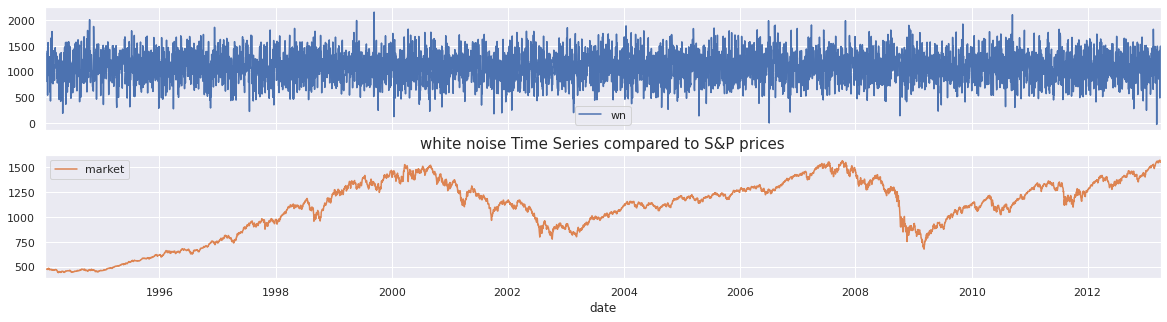

In [ ]:
plots = df[["wn", "market"]].plot(figsize=(20, 5), subplots=True, legend=True)
plt.title("white noise Time Series compared to S&P prices", size=15)

### Random Walk
A special type of time-series, where values tend to persist over time and the differences between periods are simply white noise.

$$P_{t} = prices$$
$$𝛆_{t} = residuals$$
$$P_{t}=P_{t-1}+𝛆$$
$$ε∼WN(\mu, σ^{2}) $$




In [ ]:
rw = pd.read_csv("/content/drive/MyDrive/Formations/Time Series/RandWalk.csv", index_col="date", parse_dates=True, dayfirst=True)
rw = rw.asfreq("b")

In [ ]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [ ]:
df["rw"] = rw.price

<ipython-input-16-48686e3c0f32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rw"] = rw.price


In [ ]:
df.head()

,market,wn,rw
date,,,
1994-01-07,469.90,766.231850,1122.139662
1994-01-10,475.27,1296.761121,1080.347860
1994-01-11,474.13,1374.303911,1082.095245
1994-01-12,474.17,1294.903700,1083.639265
1994-01-13,472.47,903.853582,1067.146255


Text(0.5, 1.0, 'Random Walk vs S&P')

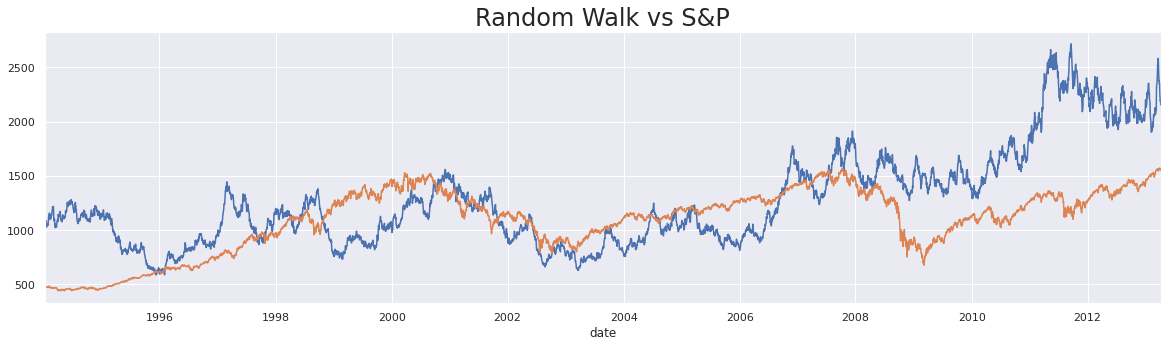

In [ ]:
df.rw.plot(figsize=(20, 5))
df.market.plot()
plt.title("Random Walk vs S&P", size=24)

* Small variations between two consecutive time periods.
* Cyclical increases and decreases in short periods of time.

**Market efficiency** : 
Measures the level of difficulty in forcasting correct future values.

*Example :*
$$price∼RW \implies incorrect predictions$$
$$price \implies great\space accuracy \implies arbitrage$$

**Arbitrage**:
Buy and sell commodities and make a safe profit, while the price adjusts



### Stationarity 
$S_{1}$ and $S_{2}$ are samples of the same length but different
$$Cov(S_{1})=Cov(S_{2})$$
This is called *weak-form* stationarity or *covariance* stationarity

**Covariance stationarity assumptions :**
1. Constant $\mu$
2. Constant $\sigma^{2}$
3. $Cov(x_{n}, x_{n+k}) = Cov(x_{m}, x_{m+k})$

**Strict stationarity**:
We say that a Time Series is strict stationar if $∀S_{1}, S_{2}∼Dist(\mu, \sigma^{2})$ of the same length, should have identical distribution. It's rarely observed in nature. That's why when we talk about stationarity, that means we talk about *Covariance stationarity*.

**Determining weak-form stationarity** : it's determined by Dickey-Fuller test (non-stationarity) :
$$H_{0}: 𝝋_{1}<1$$
$$H_{1}: 𝝋_{1}=1$$ 
$$test \space statistic < critical \space value \implies stationarity$$

In [ ]:
sts.adfuller(df.market)

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

* The first value corresponds to statistic test of Dickey-Fuller that we will compare to critical values when $\alpha=1\%, \alpha=5\% \space and \space \alpha=10\%$. 
* We notice that the statistical test is greater than all critical values which means that there is no indice of stationarity in our dataset. 
* Hence, the second value means that there is $41\%$ chance of not rejecting $H_{0}$. 
* The third value %18% refers to number of ***Lags*** used in regression when determining the $t-statistic$, so there is some other correlations going back $18$ periods. Of course, we'll take that in account when taking the appropriate model.
* $5002$ expresses the number of observations used in analysis, this value depends on the number of Lags used in regression, so two should usually add up to the sizeof dataset.
* The last line of code estimates the maximized information criteria provided. There is some apparent autocorrelation the lower the values, the easier to make predictions for the future

In [ ]:
sts.adfuller(df.wn)

(-70.72696447347815,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70817.00092940615)

The white noise is stationary.

In [ ]:
sts.adfuller(df.rw)

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

There is more than $60\%$ chance the data comes from non-stationary process

### Seasonality
Trends will appear on a cyclical basis

#### Decomposition 
Split into 3 affects 
* Trend $→$ Pattern
* Seasonal $→$ Cyclical affects
* Residual $→$ Error of prediction

##### 1. Naive Decomposition
We expect a linear relationship between three parts and the observed Time Series, there are two main approaches for Naive decomposition :
* Additive :
$$observed = trend+seasonal+residual$$ 
* Multiplicative :
$$observed = trend×seasonal×residual$$ 

In the following example, there is no concrete cyclical pattern determined by using naive decomposition. Overall the results of the additive decompostion suggest no seasonality in the data

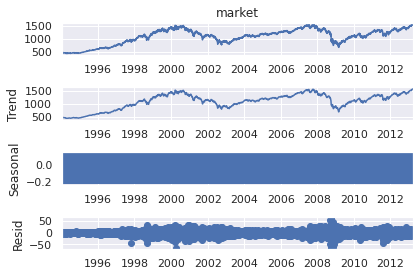

In [ ]:
s_dec_additive = seasonal_decompose(df.market, model="additive")
s_dec_additive.plot()
plt.show()

The seasonal sequence has no clear pattern once again and the trend closely ressembles the observed series. Thus, we have further proof there is no seasonality among SNP prices

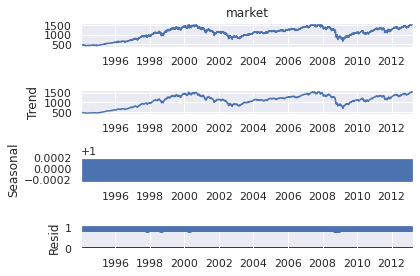

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

#### **Correlation** :
$ρ(x, y)$ : measures the similarity in the change of values of two series.

In this case, though we only have a single variable to calculate the similarity and a single time series change through time, we need to introduce new concept, ***Autocorrelation***.
#### **Autocorrelation** :
The correlation between a sequence and itself. More precisely, it measures the level of resemblance between a sequence from several periods ago and the actual data. Such a series called lagged, because it is essentially a delayed version of the original one.
#### **Autocorrelation Function (ACF)** :
It computes the autocorrelation value for however many lags we are interested in simultaneously.

* In Time Series Analysis, common practice detects analyzing the first $40$ lags, so we set the lags equal to $40$. Keep in mind by saying the first $40$ lags, we mean the last $40$ periods before the current one.
* We can also set the zero argument equal to ```False```. This argument indicated weather we include current period values in the graph. For correlation function, this is unecessary, because the correlation value and itself will always be $1$. This will lead having the first bar of the graph equal to $1$, which makes the plot difficult to comprehend correctly. Therefore setting the argument equal to ```False``` ensures we only observea plot for higher lag values.

***Results*** :
* The greater the distance in time, the more unlikely it is that this autocorrelation persists. For instance, today's prices are usually closer to yesterday's prices than the prices  month ago. Therefore we need to make sure that autocorrelation coefficient in higher lags is sufficiently greater to be significantly different from zero.
* Notice that all the lines are higher than the blue region. This suggests the coefficients are significant which is an indicator of time dependance in the data. 
* Moreover, we can see that autocorrelation barely diminishes as the lags increase, this in turn suggests that prices even a month back can still serve  as decent estimators.





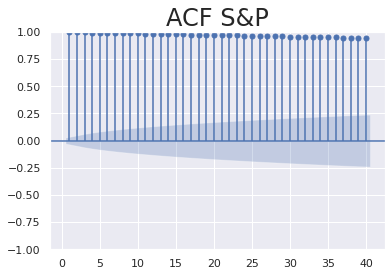

In [ ]:
sgt.plot_acf(df.market, lags=40, zero=False)
plt.title("ACF S&P", size=24)
plt.show()

We have values going either way, so there are patterns of positive and negative autocorrelation, this contrasts the ACf for closing prices where all values are positive. Also, observe how all the lines fall within the blue area, thus, the coefficients are not significant across the entire plot, this suggests there is no autocorrelation for any lag which is one of the assumptions of white noise data

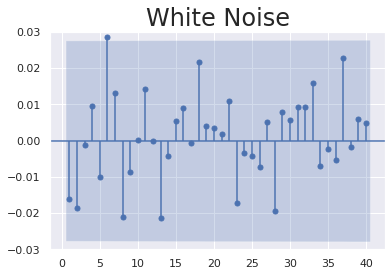

In [ ]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title("White Noise", size=24)
plt.ylim(-0.03, 0.03)
plt.show()

### PACF
Autocorrelation measures the similarity between a time series and lagged version of itself. However, the coefficients also capture second hand effects. For instance, examine the value of the autocorrelation coefficient for the third lag, it captures direct and indirect ways in which lag series affects the original one. By indirect, we refer to all other channels through which past data affects current data. In this specific case, these secondhand effects come in the form prices three days ago affecting value two and one day ago which in turn affect present prices. If we wish determine only the direct relationship between the time series and its lagged version, we need to compute the partial autocorrelation.

* PACF cancels out all additional channels a previous period value affects the present one.
* It considers the effect $x_{t-2} \rightarrow x_{t}$ in the previous example conversly to **ACF**.
* ACF and PACF values for the first lag should be identical. This is because there are no other channels through which past values can effect present values.
* Most values after the third lag are within blue area. This means, they are not significantly different from zero. So, the numeric values attached to them are not important. Since we can assume they are all essentially zero, being positive or negative is somewhat random without any lasting effects

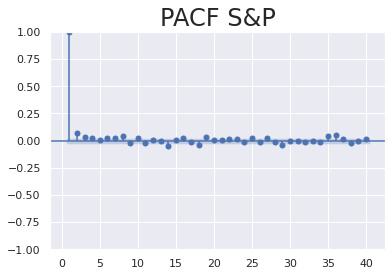

In [ ]:
sgt.plot_pacf(df.market, lags=40, zero=False, method=('ols'))
plt.title("PACF S&P", size=24)
plt.show()

(-0.05, 0.05)

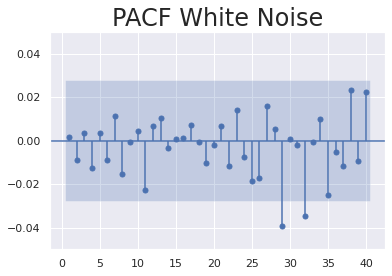

In [ ]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title("PACF White Noise", size=24)
plt.ylim(-0.05, 0.05)

## A Quick Guide to Pick the Appropriate Model
We usually start with simple model and expand it as long as it follows several conditions. 
* For starters, the new coefficients for the more complex model need to besignificantly different from zero. If that does not hold true, the estimators for these parameters are essentially zero. Therefore, they don't hep us estimate future values. This means they hold no predictive powers. So, we must omit them and revert back to simpler model.
* Secondly, we want our model to be ***parsimonious***, or in other words as simple as possible. Generally, we prefer using simpler model to a more complicated one.
* Unless, the latter provides significantly better predictions. To determine whether predictions are significantly better, we introduce a statistical test called the ***log likelihood ratio test***. 
* However, the LLR test can only be applied to models with different degrees of freedom. Thus, when comparing several models with the same total number of required lags, we need to compare **the information criteria** of each one. The lower the coefficient, the less data the model requires to make accurate predictions.
* The two most prominent measurements of the kind are the AIC and BIC. Since we prefer simplicity, we opt for the model

<ul><li>When choosing a statistical model, prioritize simplicity and consider models with lower AIC and BIC coefficients.</li><li>It's important to ensure that the chosen model fits well, with no trends that we have failed to account for.</li><li>After selecting a model, check the residuals to see if they resemble white noise. If they do, we can conclude that there is no other pattern we can account for without overtraining our model.</li><li>Overtraining occurs when a model describes the given data too well, which can lead to underwhelming performance when applied to a different dataset.</li><li>Autocorrelation can be measured using various methods, including ACF plots, the Durbin-Watson statistic, and the Ljung-Box test.</li></ul> 